## Importing the data

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
import os
os.chdir('/content/gdrive/My Drive/DL/Malaria')

In [4]:
#!unzip -q "Data.zip"

## Importing the libraries

In [5]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow
print(tensorflow.__version__)

2.7.0


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

Preparing data

In [7]:
parasitized_data = os.listdir('/content/gdrive/My Drive/DL/Malaria/cell_images/Parasitized')
print(parasitized_data[:5])

uninfected_data = os.listdir('/content/gdrive/My Drive/DL/Malaria/cell_images/Uninfected')
print('\n')
print(uninfected_data[:5])

['C97P58ThinF_IMG_20150917_145555_cell_166.png', 'C93P54ThinF_IMG_20150821_163640_cell_204.png', 'C97P58ThinF_IMG_20150917_151437_cell_165.png', 'C91P52ThinF_IMG_20150821_125256_cell_6.png', 'C97P58ThinF_IMG_20150917_152032_cell_158.png']


['C93P54ThinF_IMG_20150821_163640_cell_141.png', 'C93P54ThinF_IMG_20150821_163815_cell_149.png', 'C86P47ThinF_IMG_20150820_124943_cell_71.png', 'C77P38ThinF_IMG_20150602_142303_cell_18.png', 'C6NThinF_IMG_20150609_121955_cell_68.png']


Visualizing the images

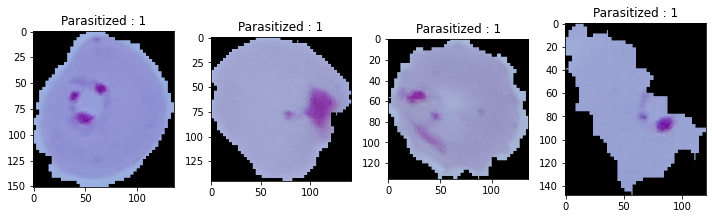

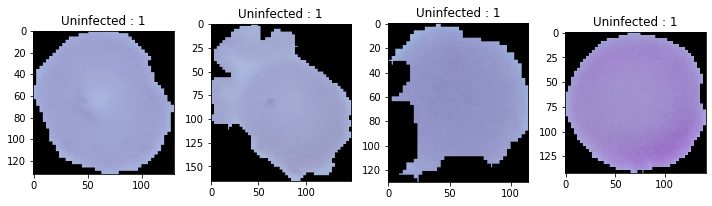

In [8]:
plt.figure(figsize = (10, 10))
for i in range(4):
  plt.subplot(1, 4, i+1)
  img = cv2.imread('/content/gdrive/My Drive/DL/Malaria/cell_images/Parasitized'+"/" + parasitized_data[i])
  plt.imshow(img)
  plt.title('Parasitized : 1')
  plt.tight_layout()
plt.show()

plt.figure(figsize = (10, 10))
for i in range(4):
  plt.subplot(1, 4, i+1)
  img = cv2.imread('/content/gdrive/My Drive/DL/Malaria/cell_images/Uninfected'+"/" + uninfected_data[i])
  plt.imshow(img)
  plt.title('Uninfected : 1')
  plt.tight_layout()
plt.show()

In [24]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('/content/gdrive/My Drive/DL/Malaria/cell_images/Parasitized' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('/content/gdrive/My Drive/DL/Malaria/cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

In [28]:
len(data)
# plt.imshow(data[1])
# plt.show()

0

In [29]:
image_data = np.array(data)
labels = np.array(labels)

In [30]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [31]:
# x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

# test_data_path = 'cell_images/test'
# train_data_path = 'cell_images/train'

In [ ]:
image_size = (130, 130) #size of the image
image_size

## Dataset function

In [ ]:
data = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.10, #shift the image width by 5%
    height_shift_range = 0.10, # shift the image height by 5%
    rescale = 1/255, # rescale the image using normalization
    shear_range = 0.1, # cut part of the image 
    zoom_range = 0.1, #zoom the image
    horizontal_flip = True, #flip the images 
    fill_mode = 'nearest' #fill in hte missing pixeels with nearest method
  )

train_dataset = data.flow_from_directory(
    train_data_path,
    target_size = image_size,
    batch_size = 16,
    color_mode = 'rgb',
    class_mode = 'binary'
)

validation_dataset = data.flow_from_directory(
    test_data_path,
    target_size = image_size,
    batch_size = 16,
    class_mode = 'binary',
    shuffle = False, #never shuffle the test or validation data
    color_mode = 'rgb'
)

In [ ]:
train_dataset.class_indices